In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [2]:
raw_data = "https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv"
    
df = pd.read_csv(raw_data)

In [3]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [4]:
df.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [5]:
df.dtypes

25k           object
age            int64
name          object
division       int64
10k           object
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k           object
5k            object
genderdiv      int64
20k           object
35k           object
city          object
40k           object
dtype: object

In [6]:
df.nunique()

25k           3245
age             61
name         16137
division      3698
10k           1459
gender           2
half          2761
official      5370
bib          16157
ctz             75
country         68
overall      16107
pace           362
state           65
30k           3862
5k             808
genderdiv     9812
20k           2644
35k           4539
city          4416
40k           5136
dtype: int64

In [7]:
df.iloc[413, :]

25k                           -
age                          32
name         Kutsukake, Kenichi
division                    269
10k                       36.90
gender                        M
half                      79.10
official                    162
bib                         498
ctz                         NaN
country                     JPN
overall                     346
pace                       6.18
state                       NaN
30k                      113.60
5k                        18.42
genderdiv                   325
20k                       74.98
35k                      133.23
city                    Ibaraki
40k                      153.13
Name: 413, dtype: object

In [8]:
df["25k"] = pd.to_numeric(df["25k"], errors="coerce")

In [9]:
df.dtypes

25k          float64
age            int64
name          object
division       int64
10k           object
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k           object
5k            object
genderdiv      int64
20k           object
35k           object
city          object
40k           object
dtype: object

In [10]:
df["10k"] = pd.to_numeric(df["10k"], errors="coerce")

In [11]:
df[["30k", "5k", "20k", "35k", "40k"]] = df[["30k", "5k", "20k", "35k", "40k"]].apply(pd.to_numeric, errors="coerce")

#df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
#df["5k"] = pd.to_numeric(df["5k"], errors="coerce")
#df["25k"] = pd.to_numeric(df["25k"], errors="coerce")

Text(0.5,1,'Histogram of Official Finishing Times')

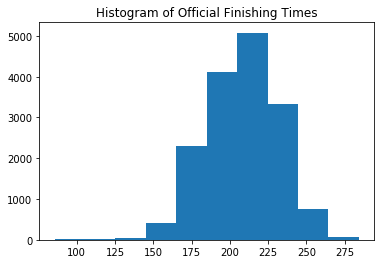

In [12]:
plt.hist(df["official"])
plt.title("Histogram of Official Finishing Times")

In [13]:
df["official"].describe()

count    16164.000000
mean       208.159470
std         23.743608
min         85.530000
25%        191.727500
50%        209.225000
75%        225.230000
max        284.230000
Name: official, dtype: float64

Text(0.5,1,'Histogram of Ages')

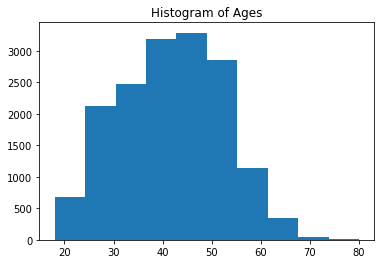

In [14]:
plt.hist(df["age"])
plt.title("Histogram of Ages")

Text(0.5,1,'Scatter Plot of Age versus Official Finishing Time')

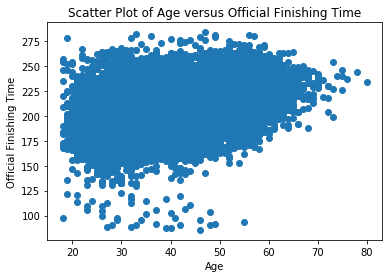

In [15]:
plt.scatter(df["age"], df["official"])
plt.xlabel("Age")
plt.ylabel("Official Finishing Time")
plt.title("Scatter Plot of Age versus Official Finishing Time")

In [16]:
df.dtypes

25k          float64
age            int64
name          object
division       int64
10k          float64
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k          float64
5k           float64
genderdiv      int64
20k          float64
35k          float64
city          object
40k          float64
dtype: object

In [17]:
z = {"M": 1, "F": 2}

In [18]:

df["gender"] = df["gender"].map(z)



In [19]:
df["gender"].value_counts()

1    9680
2    6484
Name: gender, dtype: int64

In [20]:
df2 = df.select_dtypes(exclude="object")

In [21]:
X = df.select_dtypes(exclude="object")
X.head()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
0,49.87,28,9,18.18,1,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55
1,77.27,30,5,30.90,1,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77
2,77.23,23,1,30.90,1,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78
3,50.50,32,5,18.73,1,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43
4,48.75,39,3,18.18,1,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88


In [22]:
X.isna().sum()

25k          23
age           0
division      0
10k          26
gender        0
official      0
overall       0
pace          0
30k          17
5k           66
genderdiv     0
20k          17
35k          21
40k          17
dtype: int64

In [23]:
X.shape

(16164, 14)

In [24]:
X.head()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
0,49.87,28,9,18.18,1,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55
1,77.27,30,5,30.90,1,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77
2,77.23,23,1,30.90,1,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78
3,50.50,32,5,18.73,1,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43
4,48.75,39,3,18.18,1,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88


In [25]:
X = X.dropna()

X.head()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
0,49.87,28,9,18.18,1,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55
1,77.27,30,5,30.90,1,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77
2,77.23,23,1,30.90,1,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78
3,50.50,32,5,18.73,1,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43
4,48.75,39,3,18.18,1,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88


In [26]:
#creating 4 different folds of data

offset = int(X.shape[0] / 4)

X1 = X.iloc[:offset]
X2 = X.iloc[offset: (2 * offset)]
X3 = X.iloc[(2 * offset): (3 * offset)]
X4 = X.iloc[(3 * offset):]

from sklearn.preprocessing import normalize

X1 = X1.dropna()
X1 = normalize(X1)

X2 = X2.dropna()
X2 = normalize(X2)

X3 = X3.dropna()
X3 = normalize(X3)

X4 = X4.dropna()
X4 = normalize(X4)

<h1><center>** ------k-Means-------**</center></h1>



In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [28]:
Xs = [X1, X2, X3, X4]
n_clusters = [2, 3, 4, 5, 6, 7]

for fold in Xs:
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans = kmeans.fit(fold)
        labels = kmeans.predict(fold)
        print("Fold with {} clusters: ".format(n) , metrics.silhouette_score(fold, labels, metric="euclidean"))
    print("Next Fold")



Fold with 2 clusters:  0.6395190824547817
Fold with 3 clusters:  0.5398851111004441
Fold with 4 clusters:  0.5852729677986471
Fold with 5 clusters:  0.6035528695783964
Fold with 6 clusters:  0.5602396033179594
Fold with 7 clusters:  0.5430672515348405
Next Fold
Fold with 2 clusters:  0.7347279293876545
Fold with 3 clusters:  0.7095230370977121
Fold with 4 clusters:  0.5425665288037346
Fold with 5 clusters:  0.5023136466065674
Fold with 6 clusters:  0.45226894178231203
Fold with 7 clusters:  0.4550369797661174
Next Fold
Fold with 2 clusters:  0.7276128083314249
Fold with 3 clusters:  0.5995209973872935
Fold with 4 clusters:  0.6484321022531276
Fold with 5 clusters:  0.6501606086591468
Fold with 6 clusters:  0.5172429052926169
Fold with 7 clusters:  0.5056763290112777
Next Fold
Fold with 2 clusters:  0.6565623775006963
Fold with 3 clusters:  0.7019705132889759
Fold with 4 clusters:  0.7045825470334361
Fold with 5 clusters:  0.6347548990565577
Fold with 6 clusters:  0.611711127586499
Fold

**k-Means findings:** When there are 2 clusters, the silhouette score is highest for each of the four folds of data (it's a close second in the fourth fold).

<h1><center>** ------Meanshift-------**</center></h1>


In [37]:
from sklearn.cluster import MeanShift, estimate_bandwidth

Xs = [X1, X2, X3, X4]
quantiles = [.1, .2, .3, .4, .5, .6, .65]

for fold in Xs:
    for q in quantiles:
        bandwidth = estimate_bandwidth(fold, quantile=q, n_samples=300)
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        ms = ms.fit(fold)
        labels = ms.labels_
        print("Fold with", len(ms.cluster_centers_),  "clusters with quantile: ", q, ": ", metrics.silhouette_score(fold, labels, metric="euclidean"))
    print("Next Fold")
    

Fold with 6 clusters with quantile:  0.1 :  0.550670395975054
Fold with 4 clusters with quantile:  0.2 :  0.5705444022451502
Fold with 3 clusters with quantile:  0.3 :  0.6025819097897214
Fold with 3 clusters with quantile:  0.4 :  0.609094802276224
Fold with 3 clusters with quantile:  0.5 :  0.6048446372524304
Fold with 3 clusters with quantile:  0.6 :  0.6080050009696751
Fold with 3 clusters with quantile:  0.65 :  0.6085484252319271
Next Fold
Fold with 6 clusters with quantile:  0.1 :  0.4798959340036934
Fold with 4 clusters with quantile:  0.2 :  0.7089905028672554
Fold with 3 clusters with quantile:  0.3 :  0.7078644652874782
Fold with 3 clusters with quantile:  0.4 :  0.7067459688208233
Fold with 3 clusters with quantile:  0.5 :  0.7348972661381488
Fold with 3 clusters with quantile:  0.6 :  0.7348972661381488
Fold with 3 clusters with quantile:  0.65 :  0.7348972661381488
Next Fold
Fold with 9 clusters with quantile:  0.1 :  0.4725111117616325
Fold with 5 clusters with quantile:

**Meanshift findings:** For the first two folds, the silhouette coefficient was highest when there were 3 clusters (but with quantiles in bandwidths that differed by .1). The third fold had its strongest silhouette coefficient at 2 clusters. The last fold had the highest silhouette coefficient at 5 clusters. 

<h1><center>** ------Spectral Clustering-------**</center></h1>


In [38]:
from sklearn.cluster import SpectralClustering

Xs = [X1, X2, X3, X4]
n_clusters = [2, 3, 4, 5, 6, 7]

for fold in Xs:
    for n in n_clusters:
        sc = SpectralClustering(n_clusters=n)
        sc = sc.fit(fold)
        labels = sc.labels_
        print("Fold with {} clusters: ".format(n) , metrics.silhouette_score(fold, labels, metric="euclidean"))
    print("Next Fold")



Fold with 2 clusters:  0.6268647360520654
Fold with 3 clusters:  0.5352808667829975
Fold with 4 clusters:  0.5851116930644007
Fold with 5 clusters:  0.5789448663649966
Fold with 6 clusters:  0.4838580152895348
Fold with 7 clusters:  0.5342544028089631
Next Fold
Fold with 2 clusters:  0.7343462958207945
Fold with 3 clusters:  0.7043818209968695
Fold with 4 clusters:  0.4755941687046767
Fold with 5 clusters:  0.41248146896269827
Fold with 6 clusters:  0.4740362365702498
Fold with 7 clusters:  0.43532567940398886
Next Fold
Fold with 2 clusters:  0.7276128083314249
Fold with 3 clusters:  0.6077746511748924
Fold with 4 clusters:  0.6441369570629
Fold with 5 clusters:  0.500633296747568
Fold with 6 clusters:  0.47813881235359457
Fold with 7 clusters:  0.4755142816287737
Next Fold
Fold with 2 clusters:  0.6565623775006963
Fold with 3 clusters:  0.6942306081141026
Fold with 4 clusters:  0.6997187330953472
Fold with 5 clusters:  0.5925611848266619
Fold with 6 clusters:  0.5766024316768756
Fold 

**Spectral Clustering findings:** For the first three folds, the highest silhouette coefficient was produced when there were 2 clusters. For the fourth fold, 2 clusters got the 4th highest silhouette coefficient.

## Analyzing Meanshift Clusters

In [39]:
df2.head()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k
0,49.87,28,9,18.18,1,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55
1,77.27,30,5,30.90,1,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77
2,77.23,23,1,30.90,1,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78
3,50.50,32,5,18.73,1,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43
4,48.75,39,3,18.18,1,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88


In [40]:
df2.shape

(16164, 14)

In [41]:
df2 = df2.dropna()

In [42]:
df2.shape

(16057, 14)

In [43]:
df3 = normalize(df2)

In [44]:

bandwidth = estimate_bandwidth(df3, quantile=.5, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms = ms.fit(df3)
labels = ms.labels_

df2["MScluster"] = labels

In [45]:
len(ms.cluster_centers_)

2

In [46]:
ms.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [47]:
df2.head(20)

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,MScluster
0,49.87,28,9,18.18,1,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55,1
1,77.27,30,5,30.90,1,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77,1
2,77.23,23,1,30.90,1,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78,1
3,50.50,32,5,18.73,1,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43,1
4,48.75,39,3,18.18,1,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88,1
5,77.25,28,3,30.88,1,130.47,3,4.98,92.72,15.93,3,61.53,108.70,123.78,1
6,50.50,42,6,18.73,1,90.02,6,3.43,61.63,8.98,6,39.87,74.00,84.67,1
7,77.23,28,6,30.88,1,132.73,6,5.07,92.93,15.90,6,61.52,109.07,125.20,1
8,52.62,49,11,19.77,1,91.78,11,3.50,64.00,9.38,11,41.77,75.95,86.48,1
9,77.25,32,25,30.90,1,141.67,27,5.42,92.77,15.93,27,61.53,111.13,131.98,1


In [48]:
df2[df2["MScluster"] == 0].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,MScluster
count,15729.000000,15729.000000,15729.000000,15729.000000,15729.000000,15729.000000,15729.000000,15729.000000,15729.000000,15729.000000,15729.00000,15729.000000,15729.000000,15729.000000,15729.0
mean,118.924944,41.845254,1121.151631,47.018152,1.409371,209.453922,8603.502384,7.996773,144.455486,23.565521,4438.15055,94.623967,171.031372,197.788063,0.0
std,11.692287,10.312517,938.634085,4.504247,0.491733,22.064326,4958.981076,0.841672,14.506170,2.254060,2732.32349,9.177334,17.615118,20.752153,0.0
min,88.180000,18.000000,1.000000,33.580000,1.000000,160.170000,291.000000,6.120000,108.020000,16.420000,29.00000,69.450000,128.880000,150.650000,0.0
25%,109.670000,34.000000,388.000000,43.480000,1.000000,193.020000,4318.000000,7.370000,133.120000,21.850000,2158.00000,87.330000,157.450000,182.150000,0.0
50%,119.650000,42.000000,863.000000,47.330000,1.000000,209.880000,8424.000000,8.020000,145.200000,23.700000,4200.00000,95.180000,171.750000,198.450000,0.0
75%,127.530000,49.000000,1578.000000,50.350000,2.000000,225.550000,12757.000000,8.620000,155.080000,25.230000,6361.00000,101.430000,183.900000,212.930000,0.0
max,163.620000,80.000000,3834.000000,66.680000,2.000000,284.230000,17598.000000,10.850000,195.870000,33.220000,10648.00000,131.720000,229.500000,268.400000,0.0


In [49]:
df2[df2["MScluster"] == 1].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,MScluster
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.0
mean,84.153963,31.685976,81.731707,33.282866,1.027439,146.062317,124.902439,5.578567,101.892256,16.623720,113.844512,67.180854,120.075244,137.911159,1.0
std,11.446501,7.159318,70.383102,5.032721,0.163608,18.604219,90.261477,0.710261,13.386261,2.680756,83.892699,9.320000,15.243167,17.691806,0.0
min,48.320000,18.000000,1.000000,18.030000,1.000000,85.530000,1.000000,3.270000,59.450000,8.870000,1.000000,38.230000,71.180000,80.550000,1.0
25%,81.560000,26.000000,18.750000,32.315000,1.000000,142.335000,38.000000,5.430000,98.715000,16.090000,33.750000,64.705000,116.707500,134.365000,1.0
50%,88.130000,30.000000,60.500000,35.050000,1.000000,153.945000,118.500000,5.880000,106.480000,17.430000,105.500000,70.310000,125.690000,145.125000,1.0
75%,91.707500,36.000000,142.250000,36.577500,1.000000,157.742500,204.250000,6.022500,110.575000,18.380000,187.250000,73.380000,129.707500,149.080000,1.0
max,102.430000,55.000000,224.000000,38.430000,2.000000,202.400000,290.000000,7.720000,133.920000,21.620000,269.000000,79.630000,167.530000,189.250000,1.0


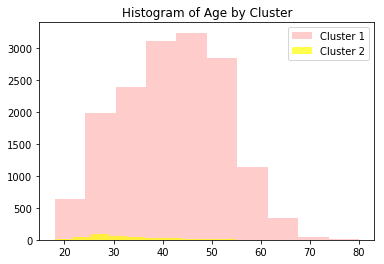

In [50]:
plt.hist(df2[df2["MScluster"] == 0]["age"], color="red", alpha=.2, label="Cluster 1")
plt.hist(df2[df2["MScluster"] == 1]["age"], color="yellow", alpha=.7, label="Cluster 2")
plt.legend()
plt.title("Histogram of Age by Cluster")
plt.show()


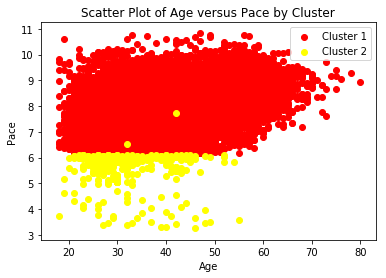

In [51]:
plt.scatter(df2[df2["MScluster"] == 0]["age"], df2[df2["MScluster"] == 0]["pace"], color="red", label="Cluster 1")
plt.scatter(df2[df2["MScluster"] == 1]["age"], df2[df2["MScluster"] == 1]["pace"], color="yellow", label="Cluster 2")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Pace")
plt.title("Scatter Plot of Age versus Pace by Cluster")
plt.show()

## Analyzing k-Means Clusters

In [52]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(df3)
labels = kmeans.predict(df3)
df2["SCcluster"] = kmeans.labels_

In [53]:
df2.head()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,MScluster,SCcluster
0,49.87,28,9,18.18,1,90.90,9,3.47,62.07,8.90,9,38.80,74.73,85.55,1,0
1,77.27,30,5,30.90,1,132.50,5,5.07,92.97,15.90,5,61.52,108.78,124.77,1,0
2,77.23,23,1,30.90,1,130.37,1,4.98,92.72,15.93,1,61.53,108.68,123.78,1,0
3,50.50,32,5,18.73,1,88.43,5,3.38,61.35,8.98,5,39.88,73.00,83.43,1,0
4,48.75,39,3,18.18,1,87.22,3,3.33,59.92,8.92,3,38.55,71.68,81.88,1,0


In [54]:
df2[df2["SCcluster"] == 0].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,MScluster,SCcluster
count,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.000000,9618.0
mean,113.249949,43.729362,1026.609482,44.788991,1.000936,200.380797,6720.416823,7.650687,137.598007,22.440894,4983.046683,90.129274,163.077644,189.024243,0.034103,0.0
std,12.464529,10.560060,835.655406,4.814582,0.030577,24.484614,4947.211533,0.934066,15.529045,2.409723,3030.393215,9.773815,19.044826,22.887746,0.181502,0.0
min,48.320000,18.000000,1.000000,18.030000,1.000000,85.530000,1.000000,3.270000,59.450000,8.870000,1.000000,38.230000,71.180000,80.550000,0.000000,0.0
25%,105.020000,36.000000,371.000000,41.780000,1.000000,183.022500,2550.250000,6.980000,127.000000,20.970000,2372.250000,83.820000,149.672500,172.700000,0.000000,0.0
50%,112.670000,45.000000,841.000000,44.580000,1.000000,199.125000,5625.000000,7.600000,136.900000,22.370000,4856.500000,89.610000,162.130000,187.720000,0.000000,0.0
75%,121.730000,51.000000,1445.000000,48.050000,1.000000,216.920000,10355.250000,8.280000,148.070000,24.050000,7477.750000,96.730000,175.750000,204.360000,0.000000,0.0
max,158.550000,80.000000,3775.000000,62.580000,2.000000,282.200000,17597.000000,10.770000,191.000000,30.720000,10648.000000,123.180000,229.500000,268.400000,1.000000,0.0


In [55]:
df2[df2["SCcluster"] == 1].describe()

,25k,age,division,10k,gender,official,overall,pace,30k,5k,genderdiv,20k,35k,40k,MScluster,SCcluster
count,6439.000000,6439.000000,6439.000000,6439.000000,6439.0,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.000000,6439.0,6439.0
mean,125.630523,38.513434,1209.422581,49.648202,2.0,219.777399,10984.390123,8.390544,152.530419,24.891775,3403.955273,99.939795,180.316253,207.828567,0.0,1.0
std,8.778716,9.202383,1069.284293,3.390291,0.0,16.927855,4026.464581,0.645663,10.944425,1.705765,1990.048892,6.884629,13.401291,15.891816,0.0,0.0
min,95.320000,18.000000,1.000000,37.830000,2.0,166.620000,556.000000,6.370000,115.480000,18.850000,29.000000,75.930000,136.150000,157.300000,0.0,1.0
25%,120.240000,31.000000,351.000000,47.580000,2.0,208.680000,8085.500000,7.970000,145.640000,23.870000,1687.500000,95.750000,171.725000,197.480000,0.0,1.0
50%,125.820000,38.000000,844.000000,49.800000,2.0,219.750000,11208.000000,8.380000,152.820000,24.980000,3336.000000,100.100000,180.450000,207.880000,0.0,1.0
75%,131.820000,45.000000,1938.500000,51.920000,2.0,232.110000,14325.500000,8.870000,160.350000,26.000000,5088.500000,104.670000,190.070000,219.480000,0.0,1.0
max,163.620000,74.000000,3834.000000,66.680000,2.0,284.230000,17598.000000,10.850000,195.870000,33.220000,6950.000000,131.720000,227.200000,266.120000,0.0,1.0


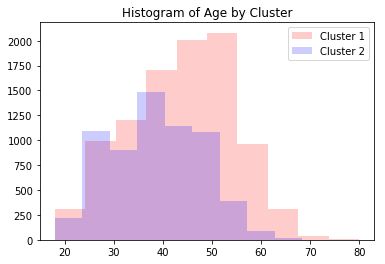

In [56]:
plt.hist(df2[df2["SCcluster"] == 0]["age"], color="red", alpha=.2, label="Cluster 1")
plt.hist(df2[df2["SCcluster"] == 1]["age"], color="blue", alpha=.2, label="Cluster 2")
plt.legend()
plt.title("Histogram of Age by Cluster")
plt.show()

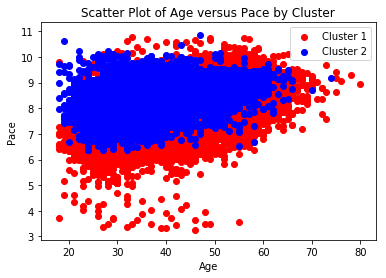

In [57]:
plt.scatter(df2[df2["SCcluster"] == 0]["age"], df2[df2["SCcluster"] == 0]["pace"], color="red", label="Cluster 1")
plt.scatter(df2[df2["SCcluster"] == 1]["age"], df2[df2["SCcluster"] == 1]["pace"], color="blue", label="Cluster 2")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Pace")
plt.title("Scatter Plot of Age versus Pace by Cluster")
plt.show()

**Conclusion:** As seen in both k-Means clustering and Meanshift clustering, the runners in the Boston Marathon can be broken into two clusters. One cluster consists of the elite runners while the other is comprised of everyone else. According to Meanshift clustering, the elite runners are younger. They also tend to be women. The number of elite runners makes up only 2% of all Boston Marathon Runners.